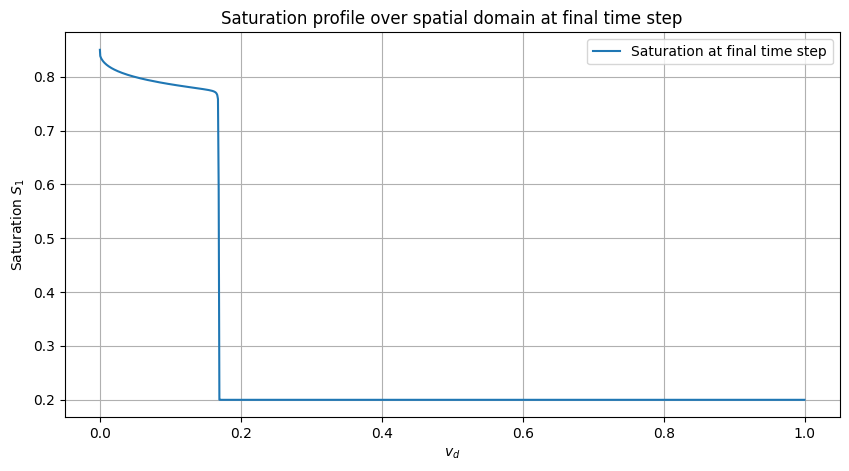

In [42]:
## Numerical solution for Advection

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the CSV data
file_path = '/home/ejt123/2024/CodingFluidFlow/case_3_fractional_flow.csv'
data_fractional = pd.read_csv(file_path)

# Parameters for discretization
delta_xd = 0.001
delta_td = 0.0001
length = 1  # Total length of the domain
time = 0.1  # Total simulation time

# Number of grid points in space and time
n_x = int(length / delta_xd) + 1
n_t = int(time / delta_td) + 1

# Assumed parameters for boundary conditions
Si1 = 0.2  # Initial saturation at t=0
Sr2 = 0.15  # Residual saturation at x=0 for t>0

# Interpolate the fractional flow data from the CSV
saturation_data = data_fractional['Saturation'].to_numpy()
fractional_flow_data = data_fractional['Fractional Flow'].to_numpy()
f_interpolated = interp1d(saturation_data, fractional_flow_data, fill_value="extrapolate")

# Create grid for S1 and initialize with boundary conditions
S1 = np.zeros((n_x, n_t))
S1[:, 0] = Si1
S1[0, :] = 1 - Sr2

# Implement the SPUW method
for j in range(1, n_t):  # Loop over time
    f1_line = f_interpolated(S1[:, j-1])  # Pre-calculate fractional flow for the current saturation line
    S1[1:, j] = S1[1:, j-1] - (delta_td/delta_xd) * (f1_line[1:] - f1_line[:-1])  # SPUW update

# Extracting saturation profile at the final time step
S1_final_ = S1[:, -1]
# vd should be in the middle of the cells

#vd = np.linspace(0, length, n_x)

#calculate vd in the middle of the cells
vd_2 = np.zeros(n_x)
for i in range(1, n_x):
    vd_2[i] = (i-0.5)*delta_xd

# Plotting V_d vs Saturation
plt.figure(figsize=(10, 5))
plt.plot(vd_2, S1_final_2, label='Saturation at final time step')
plt.xlabel('$v_d$')
plt.ylabel('Saturation $S_1$')
plt.title('Saturation profile over spatial domain at final time step')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#calculate are under the curve of the saturation profile
n_t

1001

In [44]:
df_analytical_3 = pd.read_csv('/home/ejt123/2024/CodingFluidFlow/case_3_vd_saturation_analytical.csv')

In [24]:
vd_numerical_1 = vd*10
sat_numerical_1 = S1_final

In [30]:
vd_numerical_2 = vd_2*10
sat_numerical_2 = S1_final_2

In [25]:
vd_analytical_1= df_analytical_1['Velocity of Displacement'].to_numpy()
sat_analytical_1 = df_analytical_1['Saturation'].to_numpy()

In [31]:
vd_analytical_2= df_analytical_2['Velocity of Displacement'].to_numpy()
sat_analytical_2 = df_analytical_2['Saturation'].to_numpy()

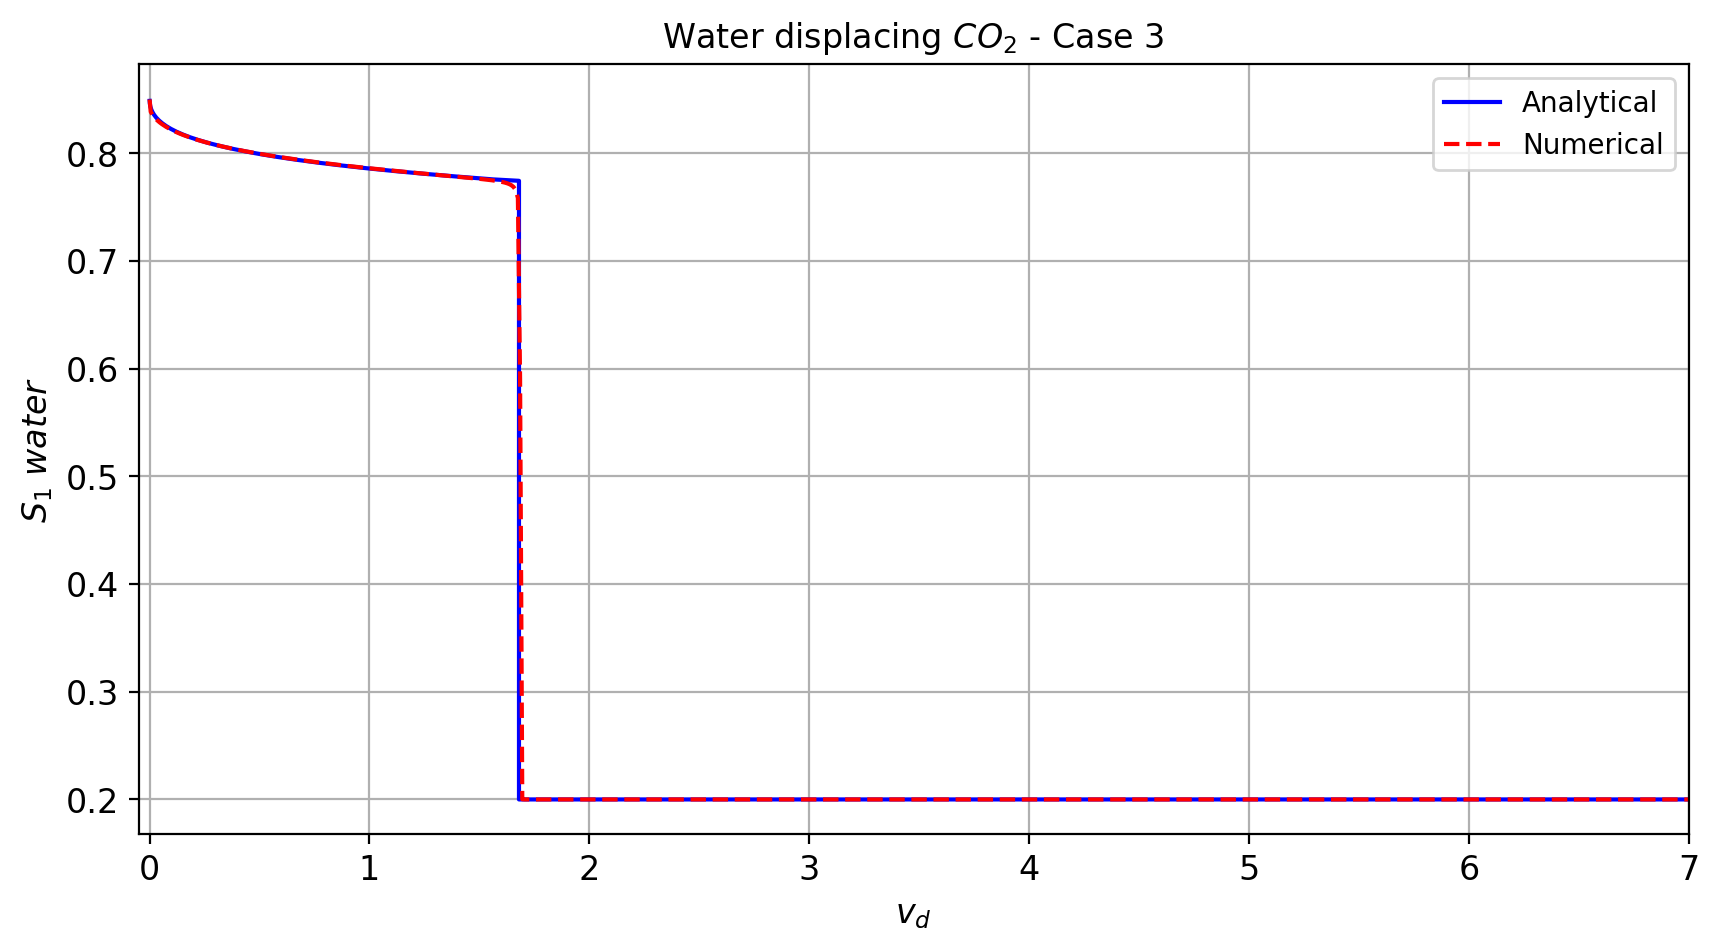

In [50]:
#scale vd of the numerical solution to match the analytical solution

# Plotting V_d vs Saturation
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(vd_analytical_3, sat_analytical_3, label='Analytical', color='blue')
#plt.plot([0, vd_analytical[0]], [0.5, 0.5], color='blue')
#plt.plot([vd_analytical[0], 7], [0.2, 0.2], color='blue')
plt.plot(vd_numerical_3, sat_numerical_3, label='Numerical', color='red', linestyle='--')
#plt.title(r'Water displacing $H_{2}$ - Case 2')
plt.title(r'Water displacing $CO_{2}$ - Case 3')
plt.legend()
plt.xlim(-0.05, 7)
plt.grid()
plt.xlabel('$v_d$', fontsize=12)
plt.ylabel('$S_1$ $water$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


